# 라이브러리 불러오기 & 경고창 무시

In [1]:
# 노트북 안에 그림을 그리기 위해
%matplotlib inline

# Import the standard Python Scientific Libraries
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Suppress Deprecation and Incorrect Usage Warnings
import warnings
warnings.filterwarnings('ignore')

# 데이터 불러오기

In [2]:
question = pd.read_csv('data/schema.csv')
print(question.shape)
question.head(3)

(290, 3)


,Column,Question,Asked
0,GenderSelect,Select your gender identity. - Selected Choice,All
1,GenderFreeForm,Select your gender identity. - A different ide...,All
2,Country,Select the country you currently live in.,All


In [8]:
# Pandas로 선다형 객관식 문제에 대한 응답을 가져옴
mcq = pd.read_csv('data/multipleChoiceResponses.csv', encoding = 'ISO-8859-1', low_memory=False)
print(mcq.shape)
mcq.head(3)

(16716, 228)


,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorExperienceLevel,JobFactorDepartment,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity
0,"Non-binary, genderqueer, or gender non-conforming",NaN,NaN,Employed full-time,NaN,NaN,Yes,NaN,DBA/Database Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,United States,30.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat important,NaN,NaN
2,Male,Canada,28.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important


# 결측값 시각화

<AxesSubplot:>

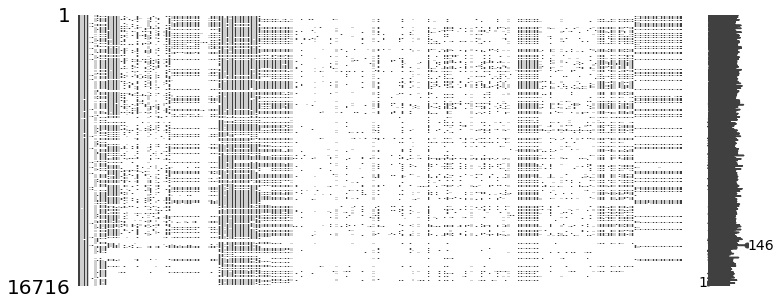

In [12]:
# missingno는 NaN 데이터들에 대해 시각화를 해준다.
# NaN 데이터의 컬럼이 많아 아래 그래프만으로는 내용을 파악하기 어렵다.
import missingno as msno
msno.matrix(mcq, figsize=(12, 5))

- 16,176명의 데이터와 228개의 선다형 객관식문제와 62개의 주관식 질문에 대한 응답이다. (총 290개의 질문) 응답하지 않은 질문이 많음

# 설문통계

<AxesSubplot:xlabel='count', ylabel='GenderSelect'>

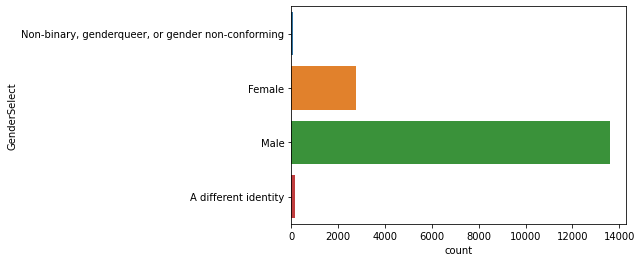

In [13]:
# 성별
sns.countplot(data = mcq, y = 'GenderSelect')

여성보다는 남성의 비율이 훨씬 높다.

In [29]:
# 국가별 응답수
df_con = pd.DataFrame(mcq['Country'].value_counts())
# print(df_con)

# 'Country' 컬럼을 인덱스로 지정해 주고
df_con['국가'] = df_con.index

# 컬럼의 순서대로 응답 수, 국가로 컬럼명을 지정해 줌
df_con.columns = ['응답 수', '국가']

# index 컬럼을 삭제하고 순위를 알기 위해 reset_index() 를 해준다.
# 우리 나라는 18위이고 전체 52개국에서 참여했지만 20위까지만 본다.
df_con = df_con.reset_index().drop('index', axis=1)
df_con.head(20)

,응답 수,국가
0,4197,United States
1,2704,India
2,1023,Other
3,578,Russia
4,535,United Kingdom
5,471,People 's Republic of China
6,465,Brazil
7,460,Germany
8,442,France
9,440,Canada


In [30]:
# 연령에 대한 정보를 본다.
mcq['Age'].describe()

count    16385.000000
mean        32.372841
std         10.473487
min          0.000000
25%         25.000000
50%         30.000000
75%         37.000000
max        100.000000
Name: Age, dtype: float64

<AxesSubplot:xlabel='Age'>

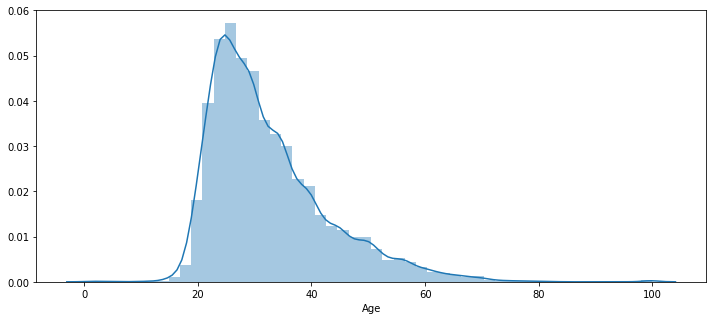

In [43]:
# 나이에 대한 그래프 시각화하기
plt.figure(figsize = (12, 5))
sns.distplot(
    mcq[mcq['Age'] > 0]['Age'],
    #hist = False,
    #color = 'red'
)

응답자의 대부분이 어리며, 20대부터 급격히 늘어나며, 30대가 가장 많다. 평균 나이는 32세다.

# 학력

<AxesSubplot:xlabel='count', ylabel='FormalEducation'>

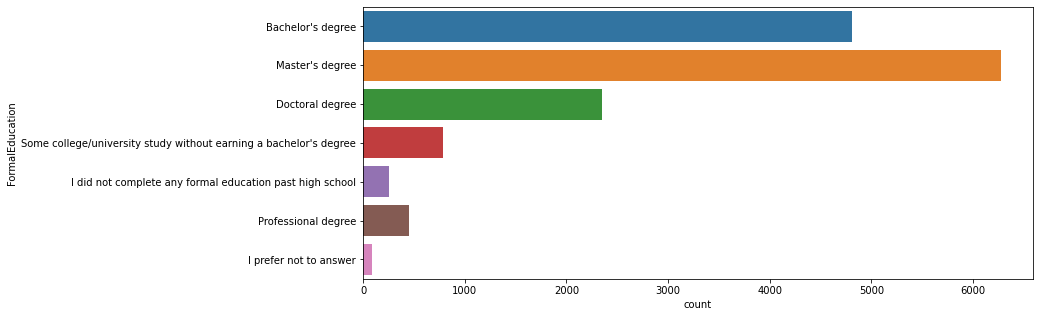

In [46]:
# 학력 시각화하기
plt.figure(figsize = (12, 5))
sns.countplot(
    data = mcq,
    y = 'FormalEducation'
)

학사 학위를 가진 사람보다 석사 학위를 가지고 있는 사람이 많으며, 박사학위를 가지고 있는 살마도 많다.

In [52]:
# value_counts() 를 사용하면 그룹화 된 데이터의 카운트 값을 보여준다.
# normalize = True 옵션을 사용하면,
# 해당 데이터가 전체 데이터에서 어느정도의 비율을 차지하는지 알 수 있다.
mcq_major_count = pd.DataFrame(
    mcq['MajorSelect'].value_counts()
)

mcq_major_percent = pd.DataFrame(
    round(mcq['MajorSelect'].value_counts(normalize = True), 3)
)

# 두개 데이터 프레임 합치기 (Merge)
mcq_major_df = mcq_major_count.merge(
    mcq_major_percent,
    left_index = True,
    right_index = True
)
mcq_major_df.columns = ['응답 수', '비율']
mcq_major_df

,응답 수,비율
Computer Science,4397,0.331
Mathematics or statistics,2220,0.167
Engineering (non-computer focused),1339,0.101
Electrical Engineering,1303,0.098
Other,848,0.064
Physics,830,0.062
"Information technology, networking, or system administration",693,0.052
A social science,531,0.040
Biology,274,0.021
Management information systems,237,0.018


컴퓨터 전공자들이 33% 로 가장 많으며 다음으로 수학, 공학, 전기 공학 순이다.

<AxesSubplot:xlabel='count', ylabel='MajorSelect'>

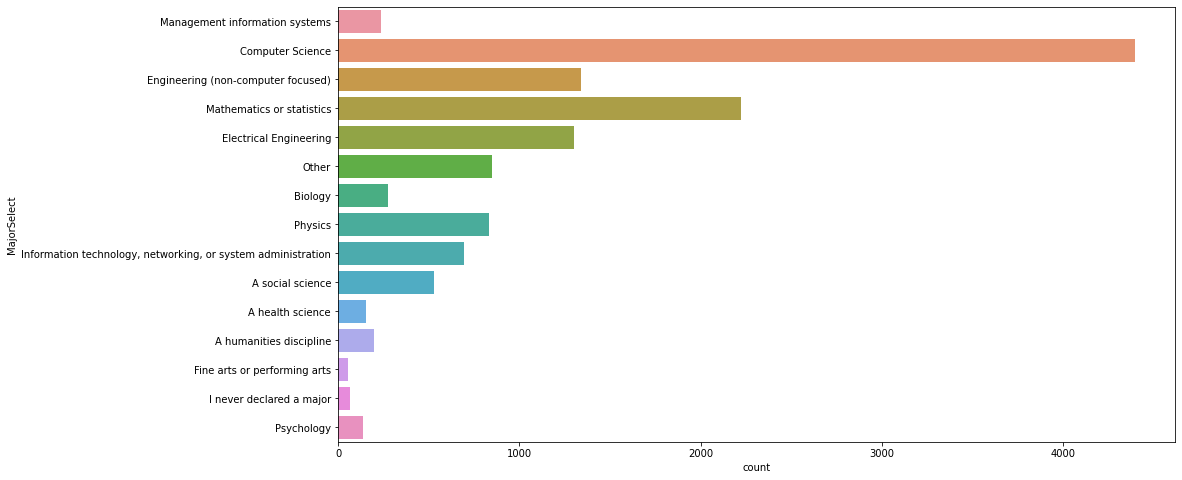

In [63]:
# 재학중인 사람들의 전공 현황
plt.figure(figsize=(15, 8))
sns.countplot(
    data = mcq,
    y = 'MajorSelect',
    # hue = 'GenderSelect'
)

# 취업 여부

In [68]:
# 취업 여부 카운트
mcq_es_count = pd.DataFrame(
    mcq['EmploymentStatus'].value_counts()
)

mcq_es_percent = pd.DataFrame(
    mcq['EmploymentStatus'].value_counts(normalize = True)
)

# 두개의 DF 합치기
mcq_es_df = mcq_es_count.merge(
    mcq_es_percent,
    left_index = True,
    right_index = True
)
mcq_es_df.columns = ['응답 수', '비율']
mcq_es_df

,응답 수,비율
Employed full-time,10897,0.651890
"Not employed, but looking for work",2110,0.126226
"Independent contractor, freelancer, or self-employed",1330,0.079564
"Not employed, and not looking for work",924,0.055276
Employed part-time,917,0.054858
I prefer not to say,420,0.025126
Retired,118,0.007059


<AxesSubplot:xlabel='count', ylabel='EmploymentStatus'>

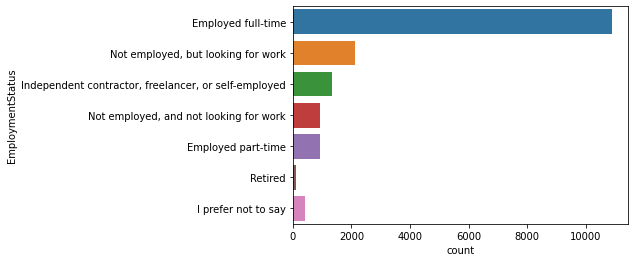

In [69]:
sns.countplot(
    data = mcq,
    y = 'EmploymentStatus'
)

응답자의 대부분이 65%가 풀타임으로 일하고 있으며, 그 다음으로 구직자가 12% 이다.

# 프로그래밍 경험
- 'Tenure' 항목은 데이터사이언스 분야에서 코딩 경험이 얼마나 되는지에 대한 질문이다. 대부분이 5년 미만이며, 특히 1~2년의 경험을 가진 사람들이 많다.

<AxesSubplot:xlabel='count', ylabel='Tenure'>

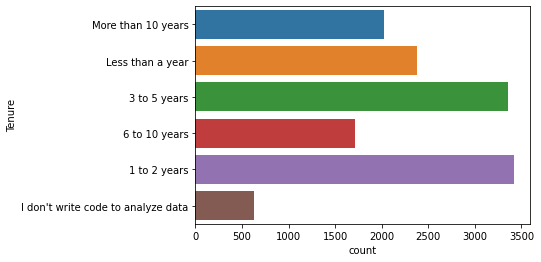

In [91]:
sns.countplot(
    data = mcq,
    y = 'Tenure'
)

The number of interviewees in Korea: 194


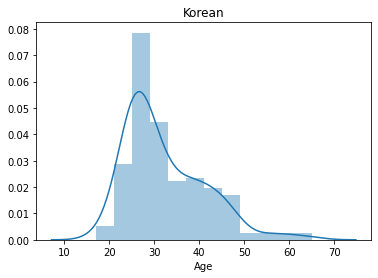

In [100]:
korea = mcq.loc[mcq['Country'] == 'South Korea']
print('The number of interviewees in Korea: ' + str(korea.shape[0]))

sns.distplot(
    korea['Age'].dropna()
)

plt.title('Korean')
plt.show()

In [102]:
pd.DataFrame(korea['GenderSelect'].value_counts())

,GenderSelect
Male,156
Female,37
A different identity,1


<AxesSubplot:xlabel='GenderSelect', ylabel='count'>

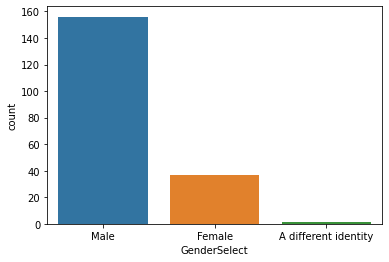

In [103]:
sns.countplot(
    data = korea,
    x = 'GenderSelect'
)

Text(0.5, 1.0, 'Korean Male')

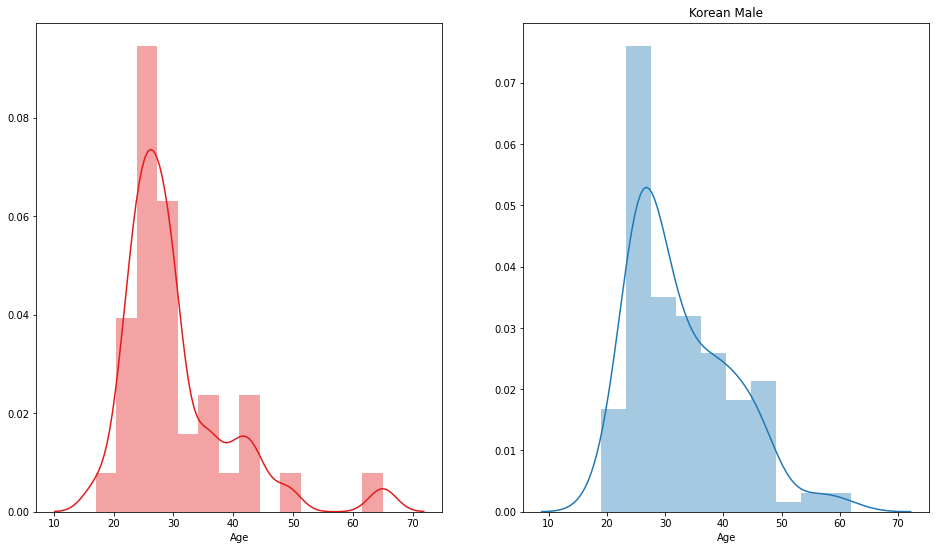

In [122]:
figure, (ax1, ax2) = plt.subplots(ncols=2)
figure.set_size_inches(16, 9)


sns.distplot(
    korea['Age'].loc[korea['GenderSelect'] == 'Female'].dropna(),
    norm_hist = False,
    color = sns.color_palette('Paired')[5],
    ax = ax1,
)
plt.title('Korean Female')

sns.distplot(
    korea['Age'].loc[korea['GenderSelect'] == 'Male'].dropna(),
    norm_hist = False,
    color = sns.color_palette('Paired')[1],
    ax = ax2
)
plt.title('Korean Male')

Text(0, 0.5, '')

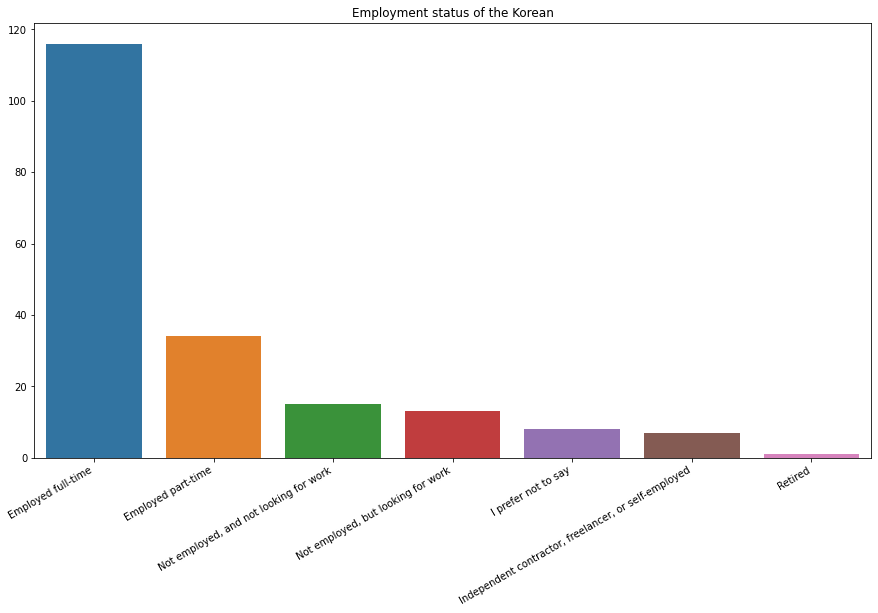

In [130]:
plt.figure(figsize=(15, 8))
sns.barplot(
    data = korea,
    x = korea['EmploymentStatus'].unique(),
    y = korea['EmploymentStatus'].value_counts()
)

plt.xticks(rotation=30, ha='right')
plt.title('Employment status of the Korean')
plt.ylabel('')

Text(0.5, 1.0, 'Korean')

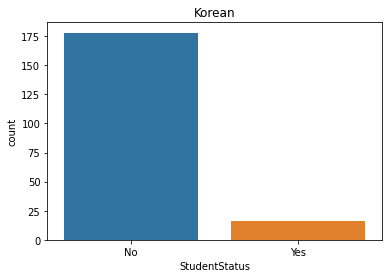

In [132]:
korea['StudentStatus'] = korea['StudentStatus'].fillna('No')

sns.countplot(
    data = korea,
    x = 'StudentStatus'
)
plt.title('Korean')

In [135]:
full_time = mcq.loc[(mcq['EmploymentStatus'] == 'Employed full-time')]
print(full_time.shape)

looking_for_job = mcq.loc[(mcq['EmploymentStatus'] == 'Not employed, but looking for work')]
print(looking_for_job.shape)

(10897, 228)
(2110, 228)


# 자주 묻는 질문 FAQ
- 초보자들이 묻는 가장 일반적인 질문에 대한 답을 시각화 해본다.

# Q1. Python과 R중 어떤 언어를 배워야 할까요?

<AxesSubplot:xlabel='count', ylabel='LanguageRecommendationSelect'>

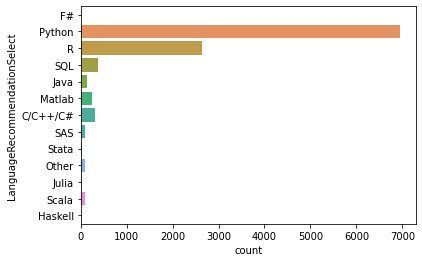

In [136]:
sns.countplot(
    data = mcq,
    y = 'LanguageRecommendationSelect'
)